# Regression Model

In [429]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [430]:
# Importing the dataset and Extracting the Independent and Dependent variables
companies = pd.read_csv('Companies.csv')


In [431]:
X = companies.iloc[:, :-1].values  #Showing first 4 columns     # independent variable
y = companies.iloc[:, 4].values    #showing last column         # dependent variable

In [432]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


##### Data Insepection

In [433]:
companies.shape

(1000, 5)

In [434]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [435]:
companies.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


##### Data Cleaning

In [436]:
# Checking Null values
companies.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [437]:
# There are no NULL values in the dataset, hence it is clean.


##### Exploratory Data Analysis

In [438]:
# Visualising Numeric Variable

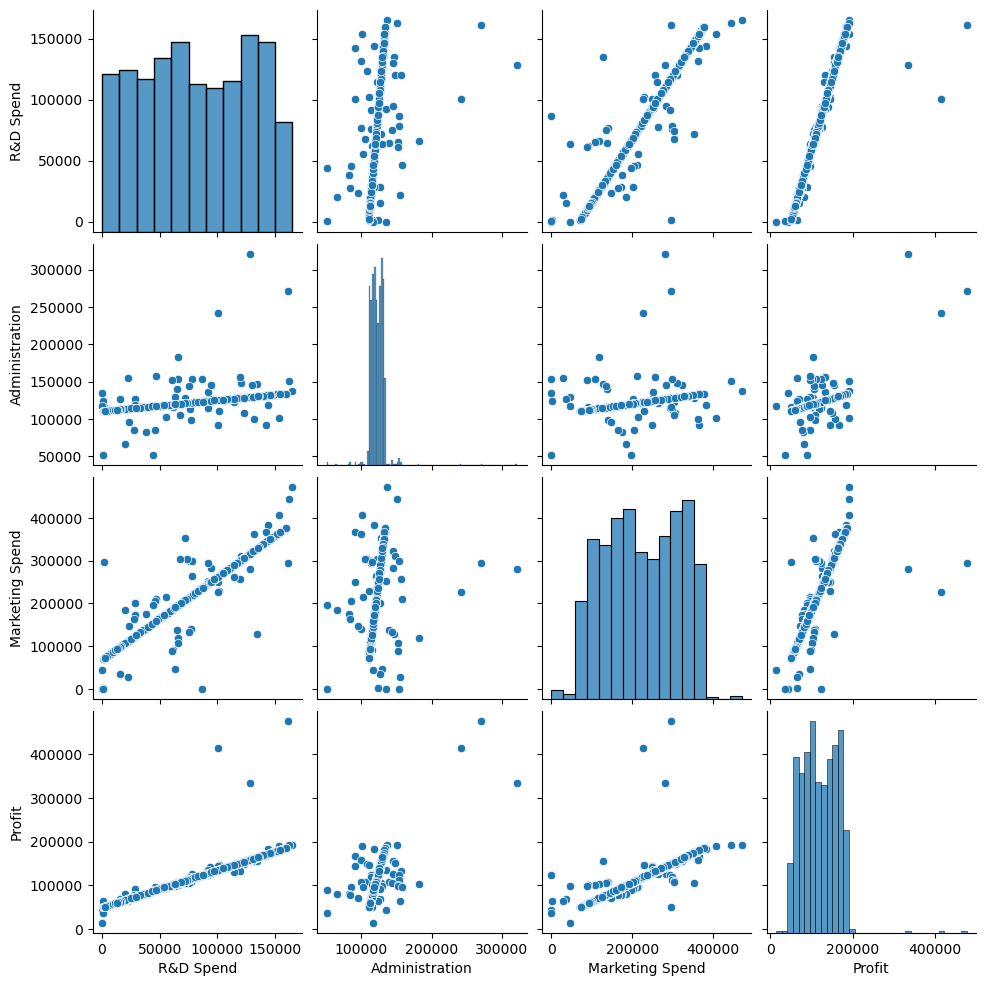

In [439]:
sns.pairplot(companies)
plt.show()

<AxesSubplot:>

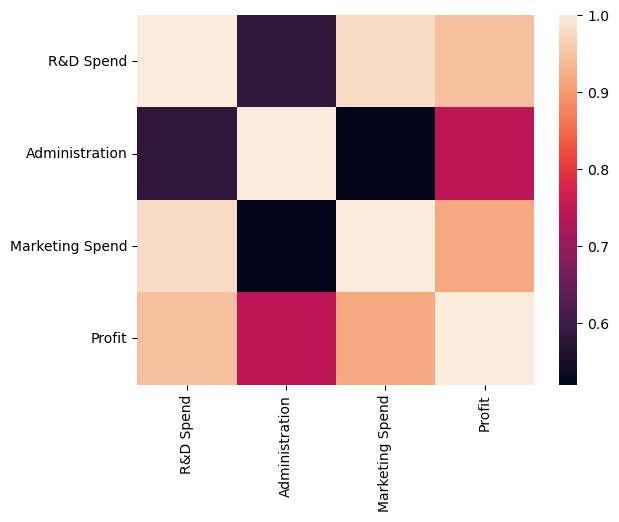

In [440]:
# Data Visualisation
# Building the Correlation matrix
sns.heatmap(companies.corr())

In [441]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Assuming X is your dataset with categorical variables in column 3
# Replace X with your actual data

# Define the column transformer
column_transformer = ColumnTransformer(
    transformers=[
        ("encoder", OneHotEncoder(), [3])  # Apply OneHotEncoder to column 3
    ],
    remainder="passthrough"  # Keep all other columns
)

# Apply the column transformer to your data
X = column_transformer.fit_transform(X)

# Now X contains the transformed data with one-hot encoding


In [442]:
# Avoiding the Dummy Variable Trap
X = X[:, 1:]
X

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       ...,
       [0.0, 0.0, 100275.47, 241926.31, 227142.82],
       [0.0, 0.0, 128456.23, 321652.14, 281692.32],
       [0.0, 1.0, 161181.72, 270939.86, 295442.17]], dtype=object)

In [443]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### (1) Linear Regression

In [444]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [445]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([ 89790.61532915,  88427.07187361,  94894.67836971, 175680.86725611,
        83411.73042088, 110571.90200074, 132145.2293644 ,  91473.37719686,
       164597.05380607,  53222.82667401,  66950.19050989, 150566.43987005,
       126915.20858596,  59337.8597105 , 177513.91053062,  75316.28143051,
       118248.14406603, 164574.40699902, 170937.2898107 , 182069.11645084,
       118845.03252689,  85669.95112228, 180992.59396144,  84145.08220145,
       105005.83769214, 101233.56772746,  53831.0766909 ,  56881.41475224,
        68896.39346905, 210040.00765884, 120778.72270894, 111724.87157654,
       101487.90541518, 137959.02649624,  63969.95996743, 108857.91214126,
       186014.72531988, 171442.64130747, 174644.26529205, 117671.49128195,
        96731.37857433, 165452.25779409, 107724.34331255,  50194.54176913,
       116513.89532179,  58632.4898682 , 158416.4682761 ,  78541.48521609,
       159727.66671744, 131137.87699644, 184880.70924516, 174609.0826688 ,
        93745.66352059,  

In [446]:
# Calculating the Coefficients
print(regressor.coef_)

[-8.80536598e+02 -6.98169073e+02  5.25845857e-01  8.44390881e-01
  1.07574255e-01]


In [447]:
# Calculating the Intercept
print(regressor.intercept_)

-51035.22972403385


In [448]:
# Evaluate Performance Metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

# Cross-Validation
cv_scores = cross_val_score(regressor, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

Mean Absolute Error: 2300.221750985377
Mean Squared Error: 192148061.8150786
Root Mean Squared Error: 13861.748151480699
R-squared Score: 0.9112695892268807
Cross-Validation Scores: [0.92901847 0.98371205 0.8637251  0.98957529 0.97568385]
Mean Cross-Validation Score: 0.9483429525180579


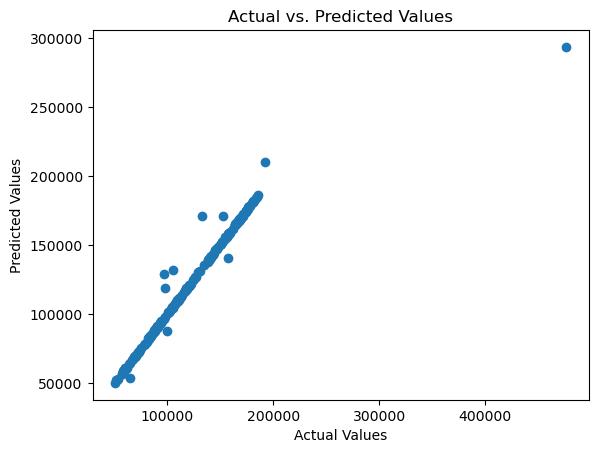

In [449]:

#  Plot Actual vs. Predicted Values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [450]:
#  Check for Overfitting
train_score = regressor.score(X_train, y_train)
test_score = regressor.score(X_test, y_test)
print("Training R-squared Score:", train_score)
print("Test R-squared Score:", test_score)

Training R-squared Score: 0.9585497032796175
Test R-squared Score: 0.9112695892268807


### (2) Polynomial Regression

In [451]:
# Importing PolynomialFeatures class from preprocessing module
from sklearn.preprocessing import PolynomialFeatures

# Creating PolynomialFeatures object of degree 2
poly_features = PolynomialFeatures(degree=2)

# Transforming the independent features to include polynomial features
X_poly = poly_features.fit_transform(X)

# Fitting Polynomial Regression to the Training set
poly_regressor = LinearRegression()
poly_regressor.fit(X_train_poly, y_train)
# Predicting the Test set results
y_pred_poly = poly_regressor.predict(X_test_poly)
y_pred_poly



array([ 89347.21057935,  87958.31765715,  94538.78861924, 174967.76733692,
        83498.13453606, 110808.96977386, 105469.52325895,  91060.1113623 ,
       164154.06209718,  52786.04406171,  65972.58603751, 150456.1088227 ,
       126842.80641858,  58130.43259726, 176955.65669656,  75294.02366052,
       118498.86204763, 164249.249461  , 154272.45080553, 181127.14395756,
       104047.58374889,  85147.40180257, 180115.9064016 ,  83591.32209829,
       104788.95000261, 100970.1625959 ,  40136.17486752,  56502.46291495,
        67973.39101734, 201143.68221971, 121018.00828362, 111575.09283309,
       101711.26180885, 138045.0515038 ,  62905.46351735, 108681.96547   ,
       184941.19437699, 170851.02680688, 173961.62014079, 117924.41424742,
        96932.84983724, 165113.65158107, 107537.03708602,  49679.70653991,
       116770.79600327,  57402.45647557, 158148.00309897,  78596.95887983,
       159430.10497755, 131300.53571385, 183876.28740097, 173927.46267076,
        93371.0877251 ,  

In [452]:
#  Evaluate Performance Metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

#  Cross-Validation
cv_scores = cross_val_score(regressor, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

Mean Absolute Error: 2300.221750985377
Mean Squared Error: 192148061.8150786
Root Mean Squared Error: 13861.748151480699
R-squared Score: 0.9112695892268807
Cross-Validation Scores: [0.92901847 0.98371205 0.8637251  0.98957529 0.97568385]
Mean Cross-Validation Score: 0.9483429525180579


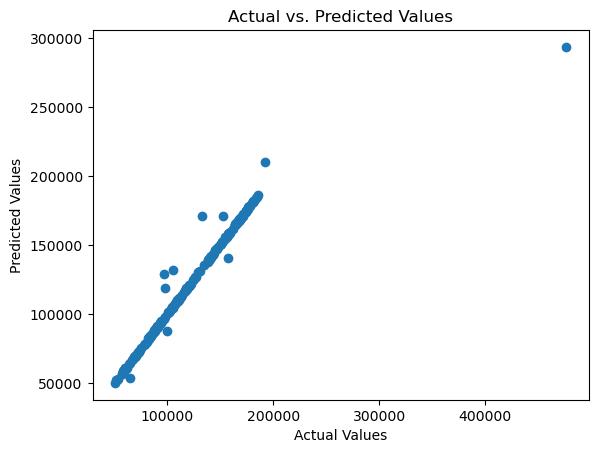

In [453]:

#  Plot Actual vs. Predicted Values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [454]:
#  Check for Overfitting
train_score = regressor.score(X_train, y_train)
test_score = regressor.score(X_test, y_test)
print("Training R-squared Score:", train_score)
print("Test R-squared Score:", test_score)

Training R-squared Score: 0.9585497032796175
Test R-squared Score: 0.9112695892268807


### (3) Ridge/Lasso Regression

In [455]:
from sklearn.linear_model import Ridge
# Fitting Ridge Regression to the Training set

ridge_regressor = Ridge(alpha=1.0)  # You can adjust the alpha value for different levels of regularization
ridge_regressor.fit(X_train_poly, y_train)

# Predicting the Test set results
y_pred_ridge = ridge_regressor.predict(X_test_poly)
y_pred_ridge


C:\Users\VKUMA159\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.45051e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


array([ 89481.12536274,  88101.30055958,  94639.99400274, 175254.12988476,
        83449.84256017, 110750.70122355,  97426.58974509,  91183.0268538 ,
       164239.98310209,  52401.5687931 ,  66276.74432035, 150513.46126662,
       126783.26618027,  58499.99991904, 176798.45111302,  75259.37944163,
       118330.93222417, 164098.79537048, 159175.42726771, 181306.41586972,
       112751.04820712,  85309.14548728, 180456.74908808,  83763.68597132,
       104831.111536  , 101033.45793391,  44765.58081129,  56517.18841938,
        68261.52224809, 189976.73577248, 120864.89929075, 111582.24797674,
       101650.18895104, 138005.22721331,  63234.71319673, 108703.64454752,
       185144.70755286, 171095.43335003, 174237.59678897, 117753.17413145,
        96872.77068351, 164962.34345559, 107564.62840618,  49292.8539829 ,
       116592.98581539,  57778.30411508, 158271.86878447,  78259.20103771,
       159565.52967372, 131213.09098951, 184258.34660793, 174203.08825733,
        93479.48660477,  

In [456]:
# Evaluate Performance Metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

#  Cross-Validation
cv_scores = cross_val_score(regressor, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

Mean Absolute Error: 2300.221750985377
Mean Squared Error: 192148061.8150786
Root Mean Squared Error: 13861.748151480699
R-squared Score: 0.9112695892268807
Cross-Validation Scores: [0.92901847 0.98371205 0.8637251  0.98957529 0.97568385]
Mean Cross-Validation Score: 0.9483429525180579


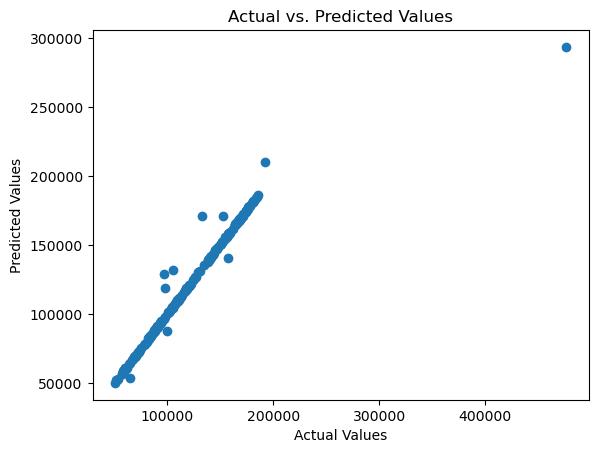

In [457]:

# Plot Actual vs. Predicted Values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [458]:
# Check for Overfitting
train_score = regressor.score(X_train, y_train)
test_score = regressor.score(X_test, y_test)
print("Training R-squared Score:", train_score)
print("Test R-squared Score:", test_score)

Training R-squared Score: 0.9585497032796175
Test R-squared Score: 0.9112695892268807


### (4) Decision Tree Regression

In [459]:
from sklearn.tree import DecisionTreeRegressor
# Fitting Decision Tree Regression to the Training set
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred



array([ 88971.02073,  87716.921  ,  94066.01447, 175166.4572 ,
        83444.60985, 110363.331  , 111461.9497 ,  90808.60147,
       164330.6254 ,  53649.48971,  66357.07385, 150475.728  ,
       125867.0108 ,  58784.63514, 176432.517  ,  75270.75002,
       118265.5261 , 163470.354  , 155954.2985 , 181579.6225 ,
        97427.84   ,  84808.91317, 180633.922  ,  83444.60985,
       104151.7784 , 100435.6109 ,  49490.75   ,  56991.47755,
        68160.48294, 192261.83   , 120790.8114 , 110963.8978 ,
       101119.044  , 137719.4492 ,  62531.55709, 107910.6604 ,
       185352.1732 , 171235.8626 , 174414.6808 , 117700.8395 ,
        96581.04826, 164330.6254 , 107019.6345 ,  50428.81124,
       116529.6061 ,  58179.79685, 158160.0789 ,  78406.85364,
       159509.0049 , 131062.8109 , 184581.6024 , 174414.6808 ,
        92920.40974,  78406.85364, 180378.4888 ,  84552.62576,
       142712.7823 , 170343.1281 ,  84378.35032, 104996.6726 ,
       141472.3512 ,  52731.98078, 140870.0758 , 138855

In [460]:
# Evaluate Performance Metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

#  Cross-Validation
cv_scores = cross_val_score(regressor, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

Mean Absolute Error: 708.5242351000005
Mean Squared Error: 24240558.397208158
Root Mean Squared Error: 4923.470158049926
R-squared Score: 0.9888061597726443
Cross-Validation Scores: [0.96902411 0.99730684 0.79282235 0.99758202 0.98332647]
Mean Cross-Validation Score: 0.9480123572591641


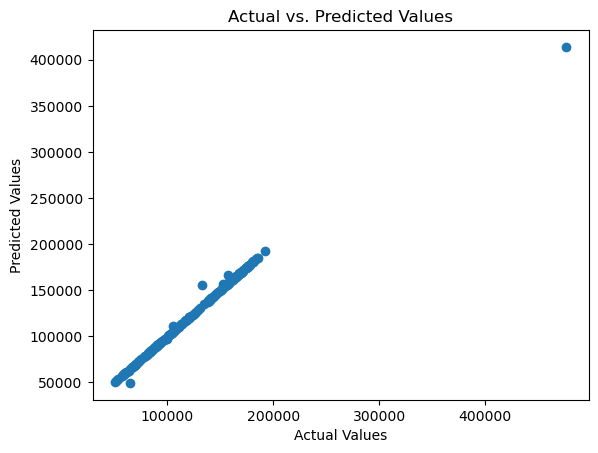

In [461]:

# Plot Actual vs. Predicted Values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [462]:
#  Check for Overfitting
train_score = regressor.score(X_train, y_train)
test_score = regressor.score(X_test, y_test)
print("Training R-squared Score:", train_score)
print("Test R-squared Score:", test_score)

Training R-squared Score: 1.0
Test R-squared Score: 0.9888061597726443


### (5) Random Forest Regression

In [463]:
from sklearn.ensemble import RandomForestRegressor
# Fitting Random Forest Regression to the Training set
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred


array([ 88871.239499,  87656.864318,  94111.633628, 175394.21126 ,
        83455.630211, 110322.83757 , 111935.84323 ,  90758.967142,
       163462.57157 ,  53388.503695,  66357.500996, 150551.41822 ,
       125987.55127 ,  58802.831547, 176448.23597 ,  75340.460196,
       118152.9305  , 163540.83307 , 147264.57121 , 181558.35065 ,
        96152.99792 ,  84830.441313, 180612.39385 ,  83455.630211,
       104241.2227  , 100539.9199  ,  42347.231786,  56987.718668,
        68219.5999  , 188677.91269 , 120721.44296 , 110879.57923 ,
       101168.84922 , 137840.75858 ,  63461.367825, 107893.31829 ,
       185289.80993 , 171272.08456 , 174365.04646 , 117592.00279 ,
        96622.10729 , 164418.95915 , 106860.56545 ,  49892.804177,
       116519.52546 ,  58069.593264, 158107.36911 ,  78508.834412,
       159510.11549 , 131025.47836 , 184626.11096 , 174365.04646 ,
        92875.217726,  78255.046063, 180347.05093 ,  84563.902406,
       142832.81024 , 170400.10934 ,  84465.48804 , 104789.165

In [464]:
# Evaluate Performance Metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

#  Cross-Validation
cv_scores = cross_val_score(regressor, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

Mean Absolute Error: 1273.44868786
Mean Squared Error: 156743997.31553394
Root Mean Squared Error: 12519.744299127437
R-squared Score: 0.9276185294993351
Cross-Validation Scores: [0.98736496 0.99779956 0.82039229 0.9918949  0.99726511]
Mean Cross-Validation Score: 0.9589433633073126


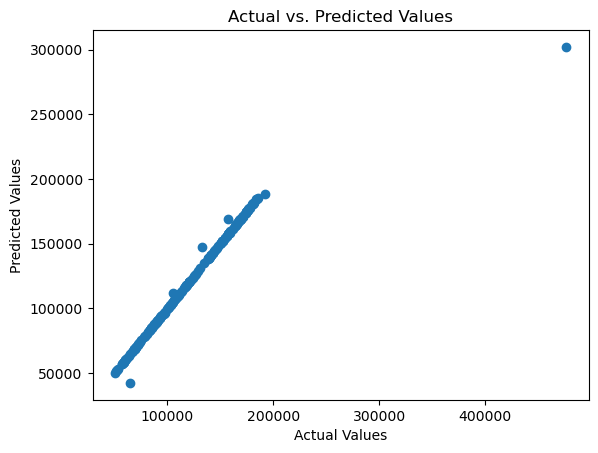

In [465]:

# Plot Actual vs. Predicted Values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [466]:
# Check for Overfitting
train_score = regressor.score(X_train, y_train)
test_score = regressor.score(X_test, y_test)
print("Training R-squared Score:", train_score)
print("Test R-squared Score:", test_score)

Training R-squared Score: 0.9894284959482647
Test R-squared Score: 0.9276185294993351


### (6) Bayesian Linear Regression

In [467]:
from sklearn.linear_model import BayesianRidge
# Initialize Bayesian Ridge Regression model
bayesian_regressor = BayesianRidge()

# Fit the model
bayesian_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = bayesian_regressor.predict(X_test)
y_pred



array([ 89280.06873203,  87916.69352552,  94383.50197717, 176040.15008563,
        83600.0536259 , 110756.87388495, 132249.62536056,  90962.6229621 ,
       164775.35947259,  53597.21972397,  66442.4622157 , 150928.82159395,
       126400.08114807,  58831.07070945, 176992.53966817,  75505.60354108,
       118614.51357688, 164054.63275485, 171311.69655299, 182245.26622201,
       119070.76507955,  85159.91297803, 181351.22137168,  83635.23221234,
       104493.41367347, 100721.60917299,  54055.0514364 ,  57073.01155948,
        68388.42503091, 209477.58868137, 121144.77996915, 111211.61848955,
       101673.99818283, 138322.96386151,  63462.59940689, 108345.01281126,
       186190.38823847, 171802.44709598, 175003.67602895, 118037.93194657,
        96918.05825458, 164932.37523103, 107211.58385479,  50569.30848221,
       116880.47882332,  58125.78790344, 158777.88137711,  78912.75417138,
       160088.9180284 , 131502.65603018, 185238.85689695, 174968.49774689,
        93234.6289061 ,  

In [468]:
#  Evaluate Performance Metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

#  Cross-Validation
cv_scores = cross_val_score(bayesian_regressor, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

Mean Absolute Error: 2273.6558792693545
Mean Squared Error: 191596142.83964965
Root Mean Squared Error: 13841.825849202469
R-squared Score: 0.911524455172135
Cross-Validation Scores: [0.93006873 0.98383072 0.8634433  0.98997775 0.9755796 ]
Mean Cross-Validation Score: 0.9485800215353091


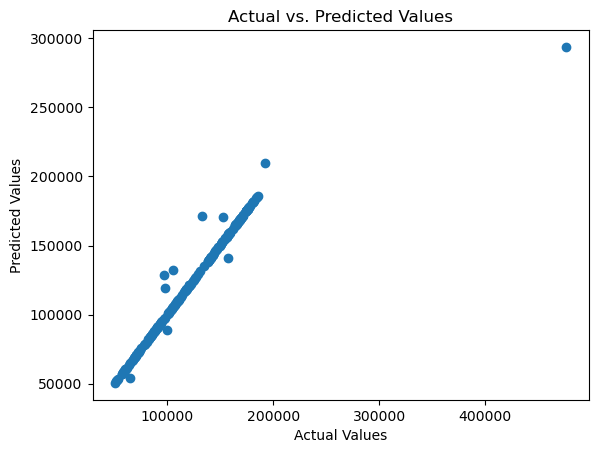

In [469]:
#  Plot Actual vs. Predicted Values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [470]:
# Check for Overfitting
train_score = bayesian_regressor.score(X_train, y_train)
test_score = bayesian_regressor.score(X_test, y_test)
print("Training R-squared Score:", train_score)
print("Test R-squared Score:", test_score)

Training R-squared Score: 0.9584658493585072
Test R-squared Score: 0.911524455172135


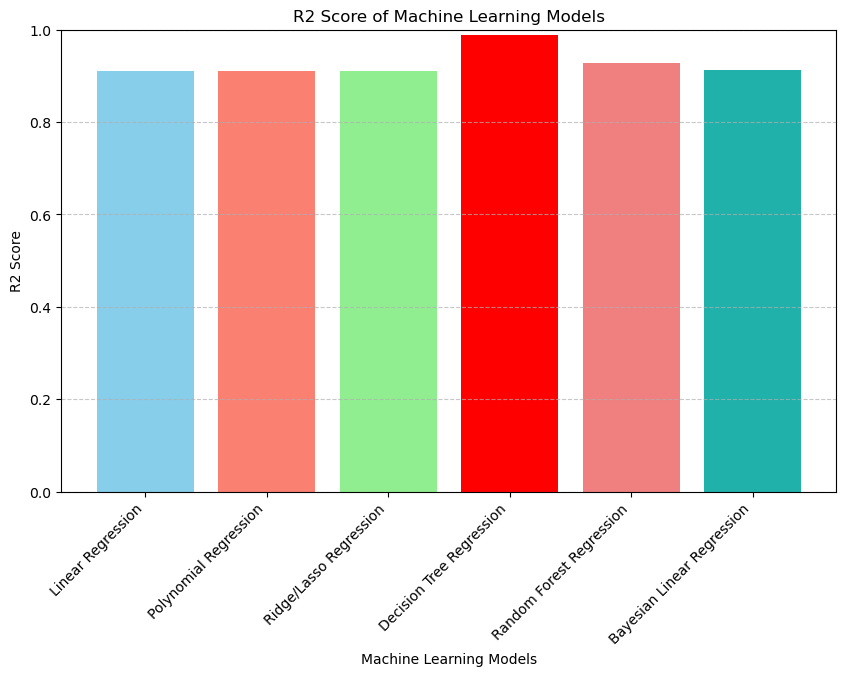

In [471]:
import matplotlib.pyplot as plt

# list of models and their respective R2 scores

models = ['Linear Regression', 'Polynomial Regression', 'Ridge/Lasso Regression', 'Decision Tree Regression', 'Random Forest Regression', 'Bayesian Linear Regression']
r2_scores = [0.9112, 0.9112, 0.9112, 0.9888,  0.9276,  0.9115]
# Define colors for each bar
colors = ['skyblue', 'salmon', 'lightgreen', 'red', 'lightcoral', 'lightseagreen']
plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color=colors)

# Adding labels and title
plt.xlabel('Machine Learning Models')
plt.ylabel('R2 Score')
plt.title('R2 Score of Machine Learning Models')
plt.ylim(0, 1)  # Setting y-axis limit to make sure the scores fit nicely
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
# Showing the plot
plt.show()
